### 02. 어떻게 만들까? 사진 준비하기

Landmark finding!

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


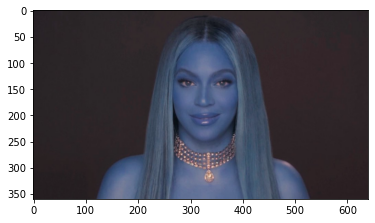

In [4]:
import os
# my_image_path = '../images/image.jpg'
my_image_path = './images/beyonce.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

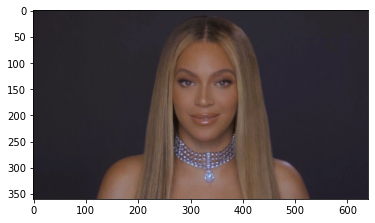

In [5]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 03. 얼굴 검출 Face Detection

In [6]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(253, 98) (408, 253)]]


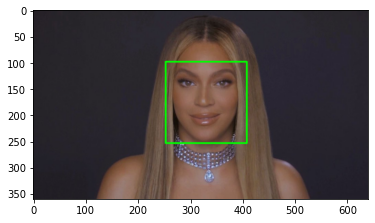

In [8]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 04. 얼굴 랜드마크 Face Landmark

In [9]:
import os
model_path = './models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [10]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [11]:
list_landmarks

[[(261, 131),
  (264, 150),
  (267, 169),
  (270, 188),
  (276, 206),
  (286, 221),
  (298, 235),
  (312, 246),
  (329, 250),
  (346, 246),
  (360, 235),
  (373, 222),
  (384, 206),
  (391, 189),
  (396, 170),
  (400, 151),
  (402, 131),
  (268, 119),
  (277, 112),
  (290, 113),
  (301, 116),
  (312, 122),
  (342, 122),
  (354, 115),
  (367, 111),
  (380, 112),
  (390, 119),
  (327, 138),
  (327, 151),
  (326, 163),
  (326, 175),
  (314, 182),
  (320, 184),
  (326, 186),
  (333, 184),
  (340, 182),
  (282, 139),
  (291, 134),
  (301, 135),
  (308, 142),
  (299, 144),
  (289, 144),
  (349, 142),
  (357, 135),
  (367, 135),
  (375, 139),
  (368, 143),
  (358, 144),
  (300, 202),
  (310, 199),
  (320, 198),
  (327, 200),
  (335, 198),
  (344, 199),
  (355, 201),
  (345, 214),
  (335, 220),
  (327, 221),
  (319, 220),
  (309, 215),
  (305, 204),
  (320, 206),
  (327, 206),
  (335, 205),
  (349, 203),
  (335, 209),
  (327, 210),
  (320, 209)]]

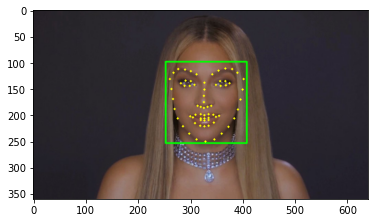

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 05. 스티커 적용하기

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(326, 175)
(x,y) : (326,97)
(w,h) : (156,156)


In [23]:
dlib_rect.height()

156

In [16]:
import os
sticker_path = './images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [17]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (248,-59)


In [18]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(97, 156, 3)


In [19]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (248,0)


In [20]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

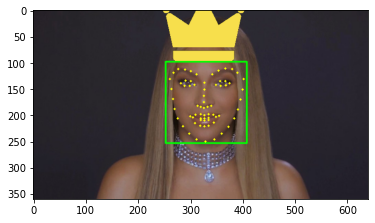

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

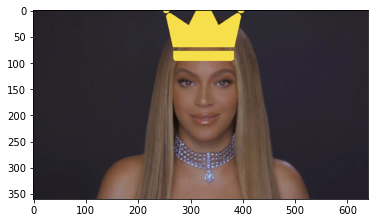

In [22]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()